In [20]:
import numpy as np
import pandas as pd
import datetime

import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)
arr  = np.zeros((10000,12))
df = pd.DataFrame(arr,columns = ['id','cusno','gender','age_21','region','date','day','product','price','quantity','time','amount'])

#거래 id 데이터

ids = np.arange(1,10001)
df.id = ids

#고객 데이터
cusnos = np.random.randint(1,1001,size = (10000))
df.cusno = cusnos
genders = np.random.choice(['male','female'],1000)
ages = np.random.randint(1,81,size = 1000)
regions = np.random.randint(1,11,size = 1000)

gendercus = []
agecus = []
regioncus = []
for i in range(10000):
    gendercus.append(genders[cusnos[i]-1])
    agecus.append(ages[cusnos[i]-1])
    regioncus.append(regions[cusnos[i]-1])
    
df.gender = gendercus
df.age_21 = agecus
df.region = regioncus

#가격 데이터
prices = np.random.randint(10,500,size=10000)*100
df.price = prices

bin_names = ['10','20','30']
#가격대 제품코드 부여
count,bin_dividers = np.histogram(df.price,bins=3)                
df['product'] = pd.cut(x=df.price,
                   bins=bin_dividers,
                   labels=bin_names, 
                   include_lowest=True)              

df['product']=df['product'].astype('str')

quantities = np.random.randint(1,101,size=10000)

df.quantity = quantities

df.amount = df.price * df.quantity

# 날짜 생성
dates = pd.period_range(start='2020-01-01',end='2021-12-31', freq = 'D')
listdate = list(dates.strftime('%Y-%m-%d'))
datefinal = np.random.choice(listdate,10000)
df.date = datefinal
# 요일 생성
def get_yoil(y,m,d):
    days = ['MON','TUE','WED','THU','FRI','SAT','SUN']
    return days[datetime.date(y,m,d).weekday()]

yoil = []
years = []
months = []
days = []

for i in range(10000):
    x =  datefinal[i].split('-')
    yoil.append(get_yoil(int(x[0]),int(x[1]),int(x[2])))
    years.append(x[0])
    months.append(x[1])
    days.append(x[2])
    
df.day = yoil    
# 시간 생성
df.time = np.random.randint(0,24,size = 10000)


display(df.head())
display(df.info())

,id,cusno,gender,age_21,region,date,day,product,price,quantity,time,amount
0,1,685,female,42,6,2020-02-13,THU,30,47200,36,11,1699200
1,2,560,female,28,2,2020-06-19,FRI,20,27800,25,6,695000
2,3,630,female,58,8,2020-08-14,FRI,10,15600,82,2,1279200
3,4,193,female,11,7,2020-04-05,SUN,30,45700,88,22,4021600
4,5,836,male,42,7,2020-09-12,SAT,10,9800,72,14,705600


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10000 non-null  int32 
 1   cusno     10000 non-null  int32 
 2   gender    10000 non-null  object
 3   age_21    10000 non-null  int32 
 4   region    10000 non-null  int32 
 5   date      10000 non-null  object
 6   day       10000 non-null  object
 7   product   10000 non-null  object
 8   price     10000 non-null  int32 
 9   quantity  10000 non-null  int32 
 10  time      10000 non-null  int32 
 11  amount    10000 non-null  int32 
dtypes: int32(8), object(4)
memory usage: 625.1+ KB


None

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요
- 2021년대 구매 비율이 2020년대보다 증가 (60% 차지)
- 노동 연령의 구매 비율이 높음 (20대 ~ 50대 범위가 60% 차지)
- 저녁 시간대(17시 ~ 23시)의 구매 비율 증가 (50% 차지)
- 직장인 기준 월급날 매출 증가 예상(25일) > 고가물품 선택 / 구매 수 100% 증가
- 블랙 프라이데이 시즌 가격인하에도 불구하고 매출 증가 (11월 넷째 주 , 중가/고가 50% 할인, 구매 수량 3배)


In [21]:
#1. 2021년대 구매 비율이 2020년대보다 증가 (60% 차지)

df1 = df.copy()

dates20 = pd.period_range(start='2020-01-01',end='2020-12-31', freq = 'D')
listdate20 = list(dates20.strftime('%Y-%m-%d'))
datefinal20 = np.random.choice(listdate20,4000)
print(datefinal20)
print(len(datefinal20))
dates21 = pd.period_range(start='2021-01-01',end='2021-12-31', freq = 'D')
listdate21 = list(dates21.strftime('%Y-%m-%d'))
datefinal21 = np.random.choice(listdate21,6000)
print(datefinal21)

datefinal20_21 = np.concatenate([datefinal20,datefinal21])
print(datefinal20_21)
np.random.shuffle(datefinal20_21)

print(datefinal20_21)
print(len(datefinal20_21))

df1.date = datefinal20_21


years = []
months = []
days = []
for i in range(10000):
    x =  datefinal20_21[i].split('-')
    years.append(x[0])
    months.append(x[1])
    days.append(x[2])

df1['year'] = years

df1.value_counts('year')

['2020-05-21' '2020-04-04' '2020-01-04' ... '2020-08-04' '2020-07-24'
 '2020-12-09']
4000
['2021-05-21' '2021-04-28' '2021-06-30' ... '2021-05-27' '2021-10-03'
 '2021-10-08']
['2020-05-21' '2020-04-04' '2020-01-04' ... '2021-05-27' '2021-10-03'
 '2021-10-08']
['2021-09-25' '2021-09-10' '2020-02-15' ... '2020-01-07' '2021-12-20'
 '2021-10-22']
10000


year
2021    6000
2020    4000
dtype: int64

In [22]:
#2 노동 연령의 구매 비율이 높음 (20대 ~ 50대 범위가 60% 차지)
df2 = df1.copy()
age_p1 = np.random.randint(1,19,size = 100)
age_p2 = np.random.randint(20,59,size = 600)
age_p3 = np.random.randint(60,80,size = 300)

age_p = np.concatenate([age_p1,age_p2,age_p3])
np.random.shuffle(age_p)

agecus_p = []
for i in range(10000):
    agecus_p.append(age_p[cusnos[i]-1])

df2.age_21 = agecus_p

def age_cat(x):
    cat = ''
    if x<20:
        cat = 'student'
    elif x<60:
        cat = 'worker'
    else:
        cat = 'senior'
    return cat

df2['age_cat'] = df2.age_21.apply(lambda x:age_cat(x))

df2

,id,cusno,gender,age_21,region,date,day,product,price,quantity,time,amount,year,age_cat
0,1,685,female,77,6,2021-09-25,THU,30,47200,36,11,1699200,2021,senior
1,2,560,female,17,2,2021-09-10,FRI,20,27800,25,6,695000,2021,student
2,3,630,female,71,8,2020-02-15,FRI,10,15600,82,2,1279200,2020,senior
3,4,193,female,60,7,2021-09-24,SUN,30,45700,88,22,4021600,2021,senior
4,5,836,male,14,7,2021-01-14,SAT,10,9800,72,14,705600,2021,student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,989,female,27,5,2021-01-08,FRI,20,20300,53,21,1075900,2021,worker
9996,9997,81,female,34,4,2021-06-17,WED,20,28400,37,3,1050800,2021,worker
9997,9998,276,male,46,4,2020-01-07,FRI,20,31400,87,14,2731800,2020,worker
9998,9999,677,female,45,6,2021-12-20,THU,10,6500,82,20,533000,2021,worker


In [23]:
#3. 저녁 시간대(17시 ~ 23시)의 구매 비율 증가 (50% 차지)
df3 = df2.copy()
time_p1 = np.random.randint(17,24,size = 5000)
time_p2 = np.random.randint(0,17,size = 5000)

time_p = np.concatenate([time_p1,time_p2])
np.random.shuffle(time_p)
df3.time = time_p
df3

,id,cusno,gender,age_21,region,date,day,product,price,quantity,time,amount,year,age_cat
0,1,685,female,77,6,2021-09-25,THU,30,47200,36,23,1699200,2021,senior
1,2,560,female,17,2,2021-09-10,FRI,20,27800,25,8,695000,2021,student
2,3,630,female,71,8,2020-02-15,FRI,10,15600,82,5,1279200,2020,senior
3,4,193,female,60,7,2021-09-24,SUN,30,45700,88,17,4021600,2021,senior
4,5,836,male,14,7,2021-01-14,SAT,10,9800,72,18,705600,2021,student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,989,female,27,5,2021-01-08,FRI,20,20300,53,4,1075900,2021,worker
9996,9997,81,female,34,4,2021-06-17,WED,20,28400,37,22,1050800,2021,worker
9997,9998,276,male,46,4,2020-01-07,FRI,20,31400,87,17,2731800,2020,worker
9998,9999,677,female,45,6,2021-12-20,THU,10,6500,82,20,533000,2021,worker


In [24]:
#4. 직장인 기준 월급날 매출 증가 예상(25일) > 구매 수량 2배 증가
df4 = df3.copy()

df4['month'] = months
df4['days'] = days

con1 = df4['age_cat'] == 'worker'
con2 = df4['days'] == '25'

display(df4.loc[con1&con2])
df4.loc[con1&con2,['quantity']] *= 2
df4.loc[con1&con2,['quantity']]=df4.loc[con1&con2,['quantity']].round(0)

df4.amount = df4.price*df4.quantity
display(df4.loc[con1&con2])
df4['payday'] = np.zeros(10000,dtype = int)
df4.loc[con1&con2,['payday']] = 1

df4

,id,cusno,gender,age_21,region,date,day,product,price,quantity,time,amount,year,age_cat,month,days
126,127,676,male,48,8,2021-04-25,TUE,30,46800,21,19,982800,2021,worker,04,25
136,137,817,female,55,6,2021-02-25,SAT,10,17000,97,13,1649000,2021,worker,02,25
157,158,99,male,34,7,2020-01-25,MON,20,17900,40,16,716000,2020,worker,01,25
164,165,943,male,37,8,2021-11-25,FRI,30,39100,47,18,1837700,2021,worker,11,25
172,173,59,male,39,3,2021-03-25,FRI,20,20300,27,19,548100,2021,worker,03,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9714,9715,457,female,43,7,2020-03-25,TUE,30,34600,82,22,2837200,2020,worker,03,25
9903,9904,887,female,57,1,2020-02-25,TUE,20,24400,93,9,2269200,2020,worker,02,25
9960,9961,666,male,46,10,2021-09-25,SUN,10,15900,14,9,222600,2021,worker,09,25
9961,9962,701,female,54,10,2020-06-25,FRI,30,42200,80,8,3376000,2020,worker,06,25


,id,cusno,gender,age_21,region,date,day,product,price,quantity,time,amount,year,age_cat,month,days
126,127,676,male,48,8,2021-04-25,TUE,30,46800,42,19,1965600,2021,worker,04,25
136,137,817,female,55,6,2021-02-25,SAT,10,17000,194,13,3298000,2021,worker,02,25
157,158,99,male,34,7,2020-01-25,MON,20,17900,80,16,1432000,2020,worker,01,25
164,165,943,male,37,8,2021-11-25,FRI,30,39100,94,18,3675400,2021,worker,11,25
172,173,59,male,39,3,2021-03-25,FRI,20,20300,54,19,1096200,2021,worker,03,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9714,9715,457,female,43,7,2020-03-25,TUE,30,34600,164,22,5674400,2020,worker,03,25
9903,9904,887,female,57,1,2020-02-25,TUE,20,24400,186,9,4538400,2020,worker,02,25
9960,9961,666,male,46,10,2021-09-25,SUN,10,15900,28,9,445200,2021,worker,09,25
9961,9962,701,female,54,10,2020-06-25,FRI,30,42200,160,8,6752000,2020,worker,06,25


,id,cusno,gender,age_21,region,date,day,product,price,quantity,time,amount,year,age_cat,month,days,payday
0,1,685,female,77,6,2021-09-25,THU,30,47200,36,23,1699200,2021,senior,09,25,0
1,2,560,female,17,2,2021-09-10,FRI,20,27800,25,8,695000,2021,student,09,10,0
2,3,630,female,71,8,2020-02-15,FRI,10,15600,82,5,1279200,2020,senior,02,15,0
3,4,193,female,60,7,2021-09-24,SUN,30,45700,88,17,4021600,2021,senior,09,24,0
4,5,836,male,14,7,2021-01-14,SAT,10,9800,72,18,705600,2021,student,01,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,989,female,27,5,2021-01-08,FRI,20,20300,53,4,1075900,2021,worker,01,08,0
9996,9997,81,female,34,4,2021-06-17,WED,20,28400,37,22,1050800,2021,worker,06,17,0
9997,9998,276,male,46,4,2020-01-07,FRI,20,31400,87,17,2731800,2020,worker,01,07,0
9998,9999,677,female,45,6,2021-12-20,THU,10,6500,82,20,533000,2021,worker,12,20,0


In [25]:
#5. 블랙 프라이데이 시즌 가격할인에도 불구하고 매출 증가 (11월 넷째 주 , 중가/고가 50% 할인, 구매 수량 3배)
df5 = df4.copy()

blackfriday = ['2020-11-23','2020-11-24','2020-11-25','2020-11-26','2020-11-27','2020-11-28','2020-11-29','2021-11-22','2021-11-23','2021-11-24','2021-11-25','2021-11-26','2021-11-27','2021-11-28']

con0 = (df5.date == blackfriday[0])
con1 = (df5.date == blackfriday[1])
con2 = (df5.date == blackfriday[2])
con3 = (df5.date == blackfriday[3])
con4 = (df5.date == blackfriday[4])
con5 = (df5.date == blackfriday[5])
con6 = (df5.date == blackfriday[6])
con7 = (df5.date == blackfriday[7])
con8 = (df5.date == blackfriday[8])
con9 = (df5.date == blackfriday[9])
con10 = (df5.date == blackfriday[10])
con11 = (df5.date == blackfriday[11])
con12 = (df5.date == blackfriday[12])
con13 = (df5.date == blackfriday[13])
con_1 = (con0|con1|con2|con3|con4|con5|con6|con7|con8|con9|con10|con11|con12|con13)
con14 = df5['product'] != '10'

df5.loc[con_1&con14,['price']]*=0.5
df5.loc[con_1&con14,['quantity']]*=3

df5.amount = df5.price*df5.quantity

df5['blackfriday'] = np.zeros(10000,dtype=int)
df5.loc[con_1&con14,['blackfriday']] = 1
df5

,id,cusno,gender,age_21,region,date,day,product,price,quantity,time,amount,year,age_cat,month,days,payday,blackfriday
0,1,685,female,77,6,2021-09-25,THU,30,47200.0,36,23,1699200.0,2021,senior,09,25,0,0
1,2,560,female,17,2,2021-09-10,FRI,20,27800.0,25,8,695000.0,2021,student,09,10,0,0
2,3,630,female,71,8,2020-02-15,FRI,10,15600.0,82,5,1279200.0,2020,senior,02,15,0,0
3,4,193,female,60,7,2021-09-24,SUN,30,45700.0,88,17,4021600.0,2021,senior,09,24,0,0
4,5,836,male,14,7,2021-01-14,SAT,10,9800.0,72,18,705600.0,2021,student,01,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,989,female,27,5,2021-01-08,FRI,20,20300.0,53,4,1075900.0,2021,worker,01,08,0,0
9996,9997,81,female,34,4,2021-06-17,WED,20,28400.0,37,22,1050800.0,2021,worker,06,17,0,0
9997,9998,276,male,46,4,2020-01-07,FRI,20,31400.0,87,17,2731800.0,2020,worker,01,07,0,0
9998,9999,677,female,45,6,2021-12-20,THU,10,6500.0,82,20,533000.0,2021,worker,12,20,0,0


In [50]:
for i in range(14):
    f'con{i} = (df5.date == blackfriday{[i]})'
    con_1 = (f'con{i}'|)

SyntaxError: invalid syntax (Temp/ipykernel_14248/2300456150.py, line 3)

#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.

<AxesSubplot:xlabel='year'>

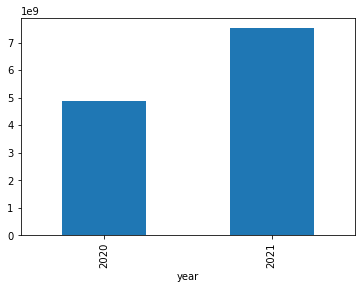

In [103]:
# 1번 검증
gr1 = df5.groupby('year')
gr11=gr1['amount'].sum().astype('int64')
gr11.plot.bar()

<AxesSubplot:xlabel='age_cat'>

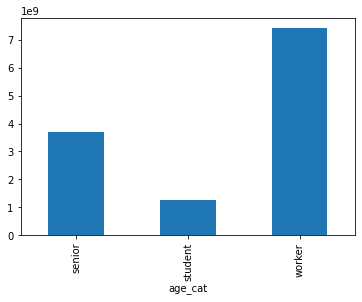

In [104]:
# 2번 검증
gr2 = df5.groupby('age_cat')
gr22=gr2['amount'].sum().astype('int64')
gr22.plot.bar()

<AxesSubplot:xlabel='time'>

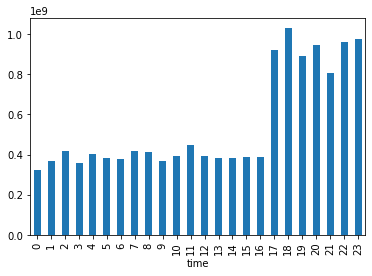

In [118]:
#3번 검증
gr3 = df5.groupby('time')
gr33=gr3['amount'].sum().astype('int64')
gr33.plot.bar()

<AxesSubplot:xlabel='payday'>

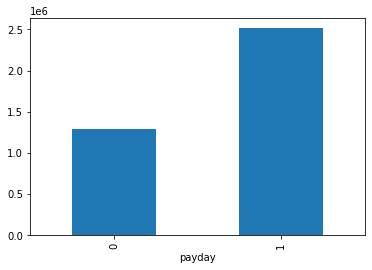

In [119]:
#4번 검증

gr4 = df5.groupby('payday')
gr44=gr4['amount'].mean().astype('int64')
gr44.plot.bar()

<AxesSubplot:xlabel='blackfriday'>

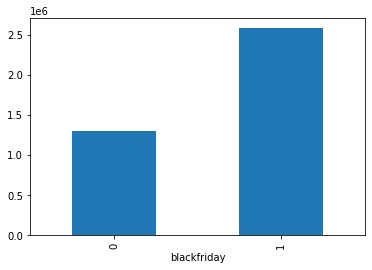

In [120]:
#5번 검증
gr5 = df5.groupby('blackfriday')
gr55=gr5['amount'].mean().astype('int64')
gr55.plot.bar()